In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\HOW to become Data Scientiest\AUS-weather\weatherAUS.csv")

In [3]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,13.4,22.9,0.6,NaN,W,W,WNW,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,7.4,25.1,0.0,NaN,WNW,NNW,WSW,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,12.9,25.7,0.0,NaN,WSW,W,WSW,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,9.2,28.0,0.0,NaN,NE,SE,E,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,17.5,32.3,1.0,NaN,W,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,75625.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,7.611178,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,3.785483,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,4.800000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,8.400000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,10.600000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,14.500000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.shape

(145460, 18)

In [6]:

# Check for nulls in each column
null_counts = df.isnull().sum()

# Display the null counts
print("Missing values in each column:")
print(null_counts)

Missing values in each column:
Date                0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
Sunshine        69835
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Cloud9am        55888
Cloud3pm        59358
Temp9am          1767
Temp3pm          3609
RainToday        3261
RainTomorrow     3267
dtype: int64


In [7]:
# Replace null values with the median for numeric columns only
df = df.fillna(df.select_dtypes(include=['number']).median())


In [8]:
print(null_counts)

Date                0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
Sunshine        69835
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Cloud9am        55888
Cloud3pm        59358
Temp9am          1767
Temp3pm          3609
RainToday        3261
RainTomorrow     3267
dtype: int64


In [9]:
# Check for duplicates in the dataset
duplicates = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 1


In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify if duplicates have been removed
print(f"Number of rows after dropping duplicates: {df.shape[0]}")


Number of rows after dropping duplicates: 145459


In [11]:
df.shape

(145459, 18)

In [12]:
df.isnull().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Sunshine            0
WindGustDir     10325
WindDir9am      10565
WindDir3pm       4227
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3260
RainTomorrow     3266
dtype: int64

In [13]:
# Replace nulls in object columns with the most frequent value
columns_with_nulls = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in columns_with_nulls:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

Date            0
MinTemp         0
MaxTemp         0
Rainfall        0
Sunshine        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [15]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify if duplicates have been removed
print(f"Number of rows after dropping duplicates: {df.shape[0]}")


Number of rows after dropping duplicates: 145456


In [16]:
df.duplicated().sum()

0

In [17]:
df.head(15)

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,13.4,22.9,0.6,8.4,W,W,WNW,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,12/2/2008,7.4,25.1,0.0,8.4,WNW,NNW,WSW,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,12/3/2008,12.9,25.7,0.0,8.4,WSW,W,WSW,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,12/4/2008,9.2,28.0,0.0,8.4,NE,SE,E,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,12/5/2008,17.5,32.3,1.0,8.4,W,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,14.6,29.7,0.2,8.4,WNW,W,W,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,No
6,12/7/2008,14.3,25.0,0.0,8.4,W,SW,W,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,No,No
7,12/8/2008,7.7,26.7,0.0,8.4,W,SSE,W,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,No
8,12/9/2008,9.7,31.9,0.0,8.4,NNW,SE,NW,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,No,Yes
9,12/10/2008,13.1,30.1,1.4,8.4,W,S,SSE,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,Yes,No


In [18]:
null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

Date            0.0
MinTemp         0.0
MaxTemp         0.0
Rainfall        0.0
Sunshine        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
Humidity9am     0.0
Humidity3pm     0.0
Pressure9am     0.0
Pressure3pm     0.0
Cloud9am        0.0
Cloud3pm        0.0
Temp9am         0.0
Temp3pm         0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145456 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145456 non-null  int32  
 1   MinTemp       145456 non-null  float64
 2   MaxTemp       145456 non-null  float64
 3   Rainfall      145456 non-null  float64
 4   Sunshine      145456 non-null  float64
 5   WindGustDir   145456 non-null  int32  
 6   WindDir9am    145456 non-null  int32  
 7   WindDir3pm    145456 non-null  int32  
 8   Humidity9am   145456 non-null  float64
 9   Humidity3pm   145456 non-null  float64
 10  Pressure9am   145456 non-null  float64
 11  Pressure3pm   145456 non-null  float64
 12  Cloud9am      145456 non-null  float64
 13  Cloud3pm      145456 non-null  float64
 14  Temp9am       145456 non-null  float64
 15  Temp3pm       145456 non-null  float64
 16  RainToday     145456 non-null  int32  
 17  RainTomorrow  145456 non-null  int32  
dtypes: float6

In [29]:
# Check for outliers using the IQR method
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"Column {column} has {outliers} outliers.")


Column MinTemp has 0 outliers.
Column MaxTemp has 63 outliers.
Column Rainfall has 22181 outliers.
Column Sunshine has 13052 outliers.
Column Humidity9am has 630 outliers.
Column Humidity3pm has 0 outliers.
Column Pressure9am has 0 outliers.
Column Pressure3pm has 0 outliers.
Column Cloud9am has 0 outliers.
Column Cloud3pm has 0 outliers.
Column Temp9am has 49 outliers.
Column Temp3pm has 66 outliers.


In [30]:
def replace_outliers_with_median(df, column):
    # Calculate the first (Q1) and third (Q3) quartiles, and the Interquartile Range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median of the column
    median = df[column].median()

    # Replace values outside the bounds with the median
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# List of columns that have outliers
columns_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am','Humidity3pm',
                         'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Apply the outlier replacement function to each column
for column in columns_with_outliers:
    replace_outliers_with_median(df, column)


In [31]:
# Check for outliers using the IQR method
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"Column {column} has {outliers} outliers.")


Column MinTemp has 0 outliers.
Column MaxTemp has 0 outliers.
Column Rainfall has 0 outliers.
Column Sunshine has 0 outliers.
Column Humidity9am has 0 outliers.
Column Humidity3pm has 0 outliers.
Column Pressure9am has 0 outliers.
Column Pressure3pm has 0 outliers.
Column Cloud9am has 0 outliers.
Column Cloud3pm has 0 outliers.
Column Temp9am has 0 outliers.
Column Temp3pm has 0 outliers.


In [32]:
def replace_outliers_with_median(df, column):
    # Calculate the first (Q1) and third (Q3) quartiles, and the Interquartile Range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median of the column
    median = df[column].median()

    # Replace values outside the bounds with the median
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# List of columns that have outliers
columns_with_outliers = [ 'Pressure9am', 'Pressure3pm', 'Cloud3pm']

# Apply the outlier replacement function to each column
for column in columns_with_outliers:
    replace_outliers_with_median(df, column)


In [33]:
# Check for outliers using the IQR method
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"Column {column} has {outliers} outliers.")


Column MinTemp has 0 outliers.
Column MaxTemp has 0 outliers.
Column Rainfall has 0 outliers.
Column Sunshine has 0 outliers.
Column Humidity9am has 0 outliers.
Column Humidity3pm has 0 outliers.
Column Pressure9am has 0 outliers.
Column Pressure3pm has 0 outliers.
Column Cloud9am has 0 outliers.
Column Cloud3pm has 0 outliers.
Column Temp9am has 0 outliers.
Column Temp3pm has 0 outliers.


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of object (categorical) columns
object_columns = df.select_dtypes(include='object').columns

# Apply Label Encoding to each object column
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145456 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145456 non-null  int32  
 1   MinTemp       145456 non-null  float64
 2   MaxTemp       145456 non-null  float64
 3   Rainfall      145456 non-null  float64
 4   Sunshine      145456 non-null  float64
 5   WindGustDir   145456 non-null  int32  
 6   WindDir9am    145456 non-null  int32  
 7   WindDir3pm    145456 non-null  int32  
 8   Humidity9am   145456 non-null  float64
 9   Humidity3pm   145456 non-null  float64
 10  Pressure9am   145456 non-null  float64
 11  Pressure3pm   145456 non-null  float64
 12  Cloud9am      145456 non-null  float64
 13  Cloud3pm      145456 non-null  float64
 14  Temp9am       145456 non-null  float64
 15  Temp3pm       145456 non-null  float64
 16  RainToday     145456 non-null  int32  
 17  RainTomorrow  145456 non-null  int32  
dtypes: float6

In [36]:
df.head(15)

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,890,13.4,22.9,0.0,8.4,13,13,14,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,989,7.4,25.1,0.0,8.4,14,6,15,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1088,12.9,25.7,0.0,8.4,15,13,15,38.0,30.0,1007.6,1008.7,5.0,5.0,21.0,23.2,0,0
3,1115,9.2,28.0,0.0,8.4,4,9,0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1124,17.5,32.3,0.0,8.4,13,1,7,82.0,33.0,1010.8,1006.0,7.0,5.0,17.8,29.7,0,0
5,1133,14.6,29.7,0.0,8.4,14,13,13,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
6,1142,14.3,25.0,0.0,8.4,13,12,13,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0
7,1151,7.7,26.7,0.0,8.4,13,10,13,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
8,1160,9.7,31.9,0.0,8.4,6,9,7,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,1
9,899,13.1,30.1,0.0,8.4,13,8,10,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0


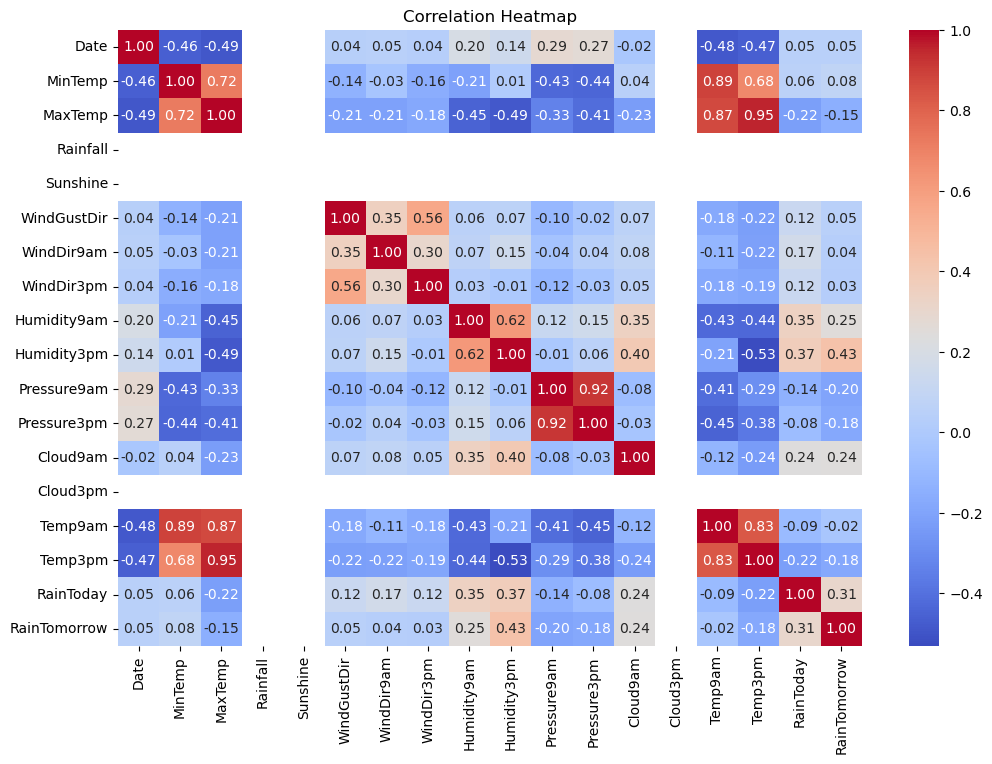

In [37]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


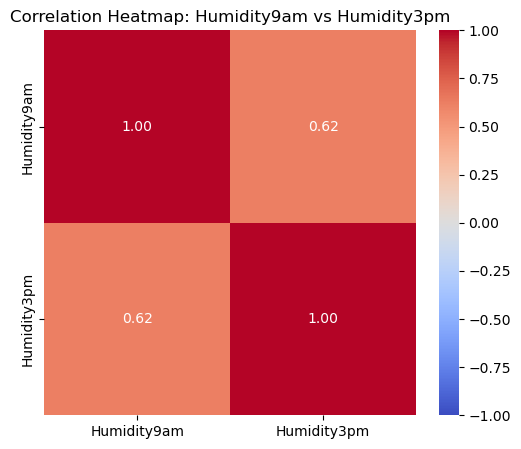

The correlation between Humidity9am and Humidity3pm is: 61.77746254868109%


In [38]:
# Correlation matrix for Humidity9am and Humidity3pm
corr = df[['Humidity9am', 'Humidity3pm']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Humidity9am vs Humidity3pm')
plt.show()
# Convert to percentage
corr_value = corr.iloc[0, 1]

correlation_percentage = abs(corr_value) * 100

print(f"The correlation between Humidity9am and Humidity3pm is: {correlation_percentage}%")

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


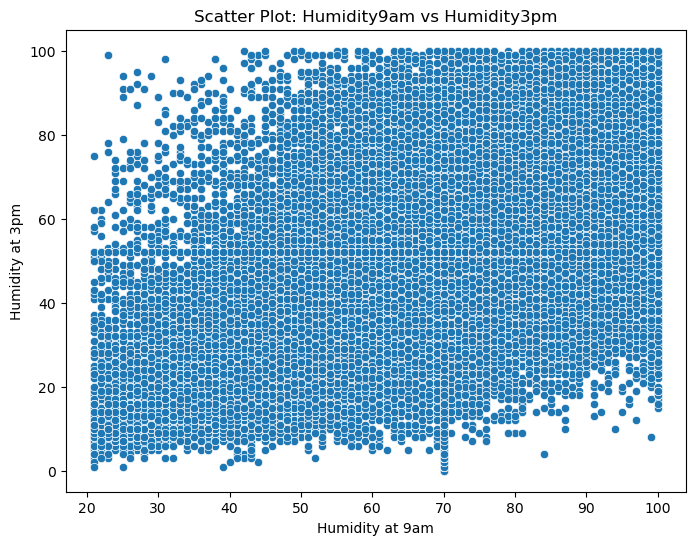

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Humidity9am and Humidity3pm
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Humidity9am'], y=df['Humidity3pm'])
plt.title('Scatter Plot: Humidity9am vs Humidity3pm')
plt.xlabel('Humidity at 9am')
plt.ylabel('Humidity at 3pm')
plt.show()


Correlation between Cloud3pm and RainToday: nan


C:\Users\Lenovo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Lenovo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

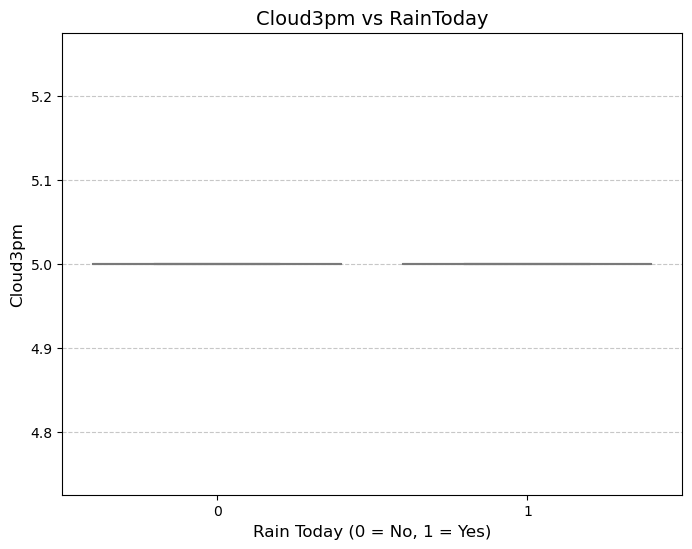

In [40]:

correlation = df['Cloud3pm'].corr(df['RainToday'])
print(f"Correlation between Cloud3pm and RainToday: {correlation:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainToday', y='Cloud3pm', data=df, palette='coolwarm')
plt.title('Cloud3pm vs RainToday', fontsize=14)
plt.xlabel('Rain Today (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Cloud3pm', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

Text(0.5, 1.0, 'Distribution of Temp3pm and Temp9am')

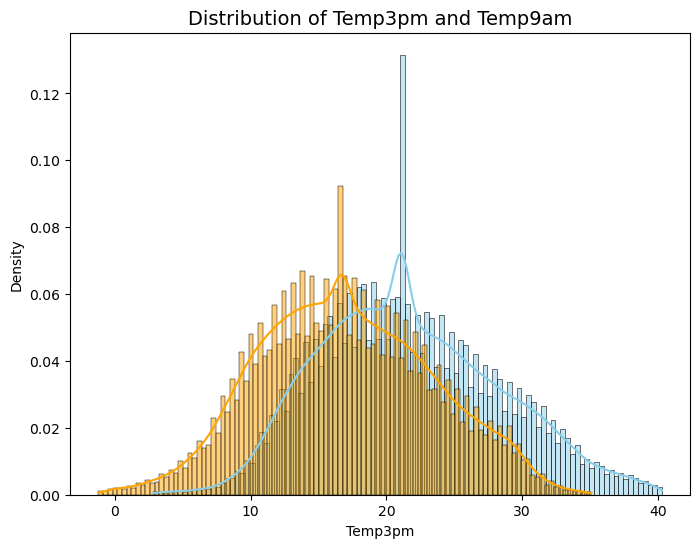

In [41]:
plt.figure(figsize=(8, 6))

# Plot Temp3pm
sns.histplot(df['Temp3pm'], kde=True, color='skyblue', label='Temp3pm', stat='density')
sns.histplot(df['Temp9am'], kde=True, color='orange', label='Temp9am', stat='density')

plt.title('Distribution of Temp3pm and Temp9am', fontsize=14)


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


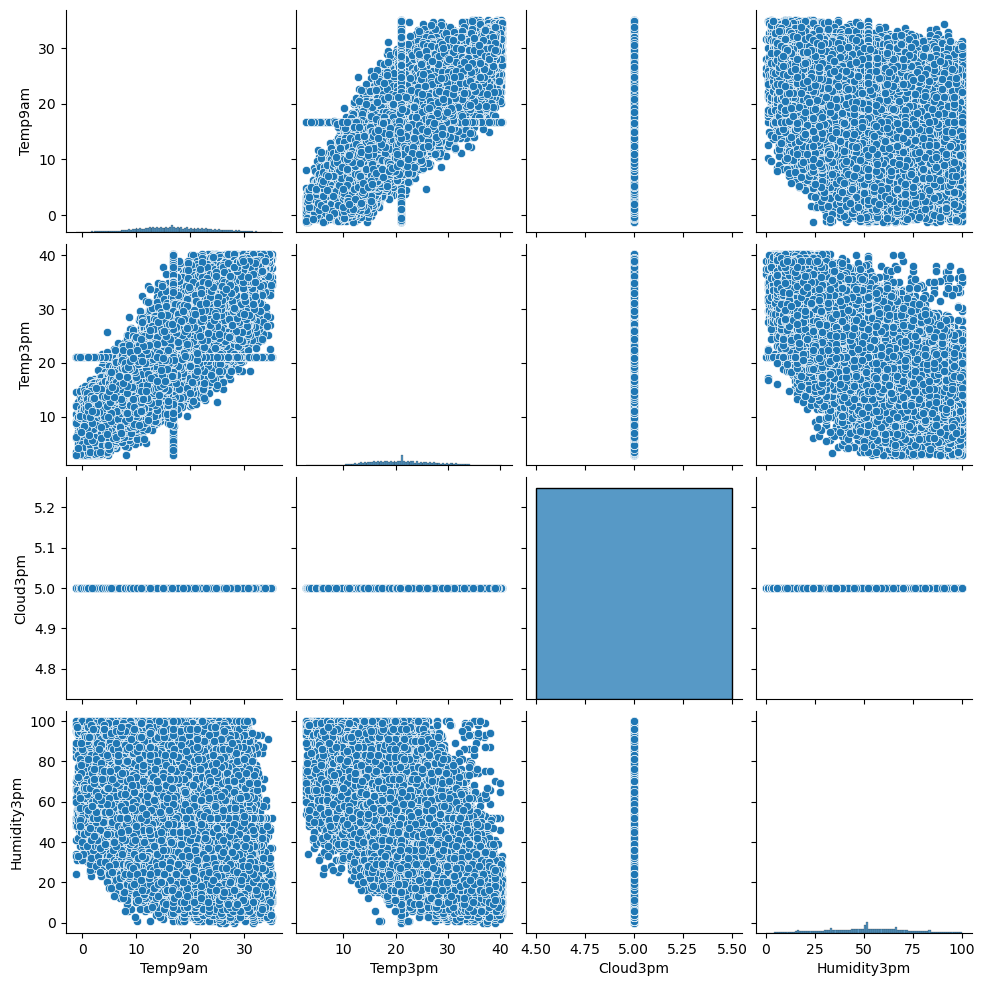

In [42]:
sns.pairplot(df[['Temp9am', 'Temp3pm', 'Cloud3pm', 'Humidity3pm']])
plt.show()


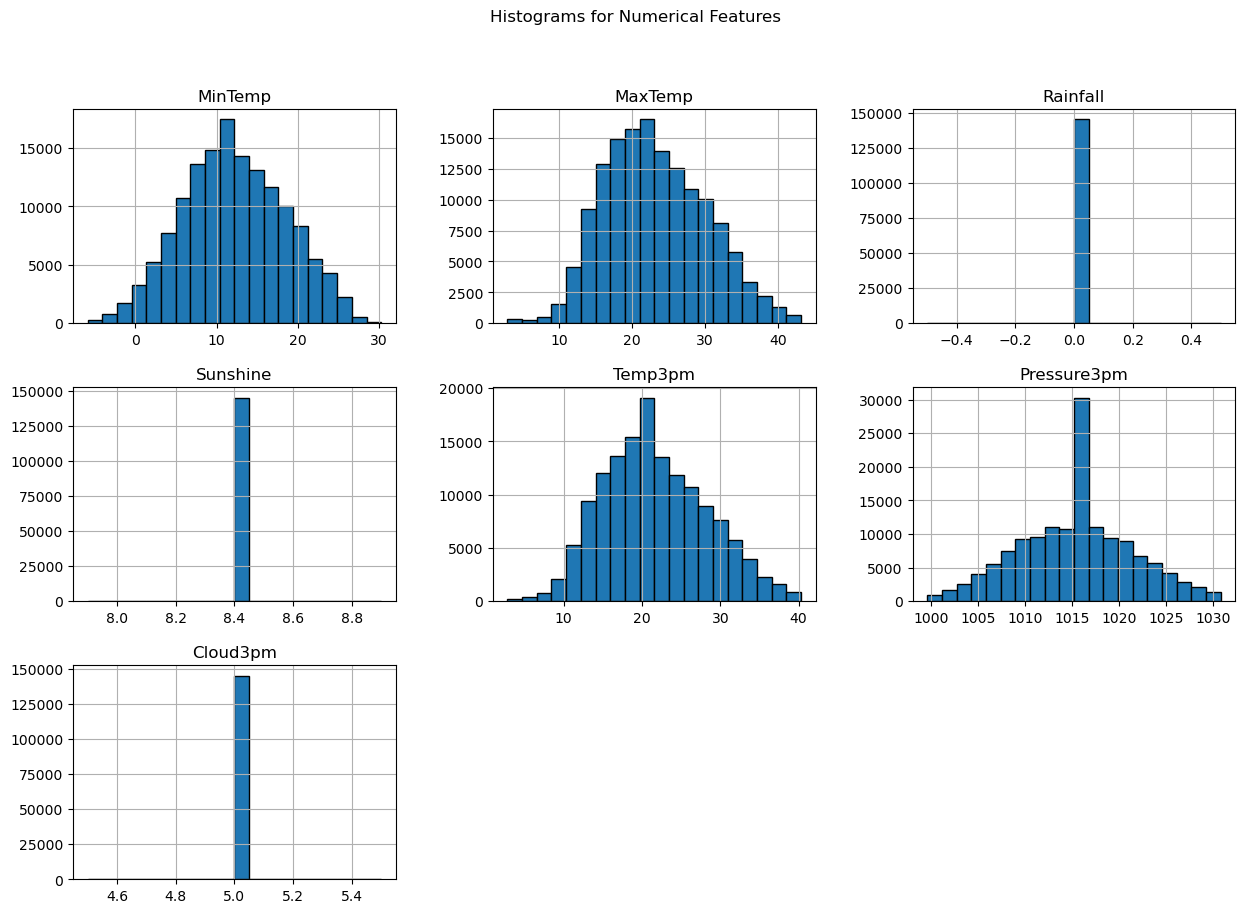

In [43]:

# 1. Histograms for numerical features
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Temp3pm', 'Pressure3pm', 'Cloud3pm']
df[numerical_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms for Numerical Features")
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

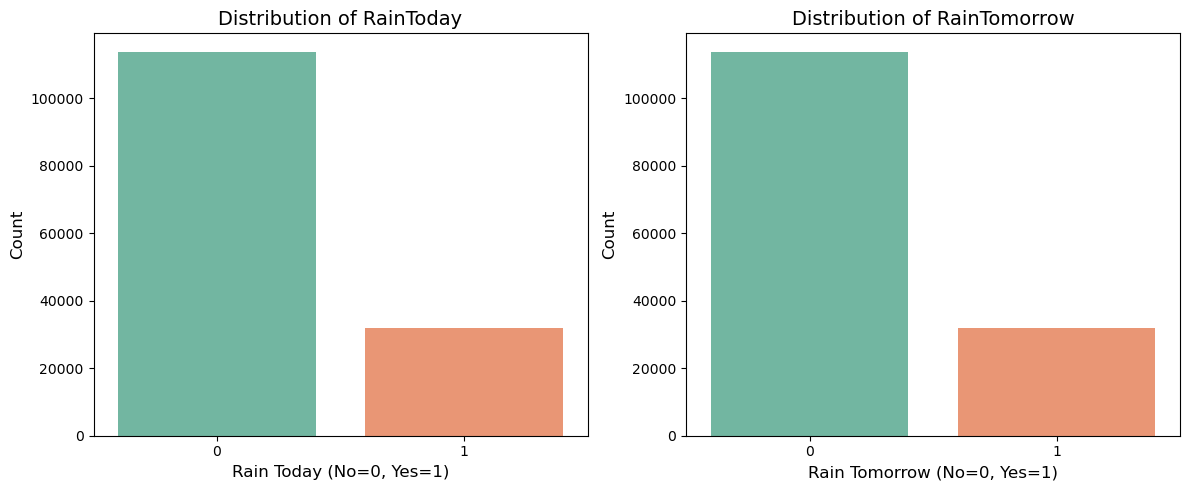

In [44]:

# 1. Count Plot for RainToday and RainTomorrow
plt.figure(figsize=(12, 5))

# RainToday
plt.subplot(1, 2, 1)
sns.countplot(x='RainToday', data=df, palette='Set2')
plt.title('Distribution of RainToday', fontsize=14)
plt.xlabel('Rain Today (No=0, Yes=1)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# RainTomorrow
plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', data=df, palette='Set2')
plt.title('Distribution of RainTomorrow', fontsize=14)
plt.xlabel('Rain Tomorrow (No=0, Yes=1)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()



C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

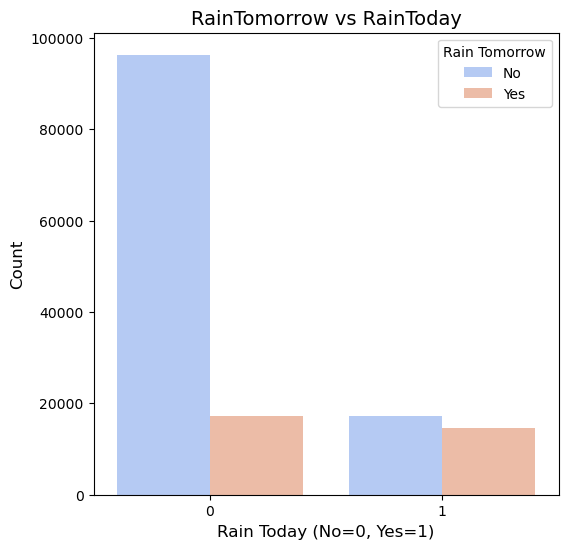

In [45]:

# 2. Grouped Bar Plot: RainTomorrow vs RainToday
plt.figure(figsize=(6, 6))
sns.countplot(x='RainToday', hue='RainTomorrow', data=df, palette='coolwarm')
plt.title('RainTomorrow vs RainToday', fontsize=14)
plt.xlabel('Rain Today (No=0, Yes=1)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()

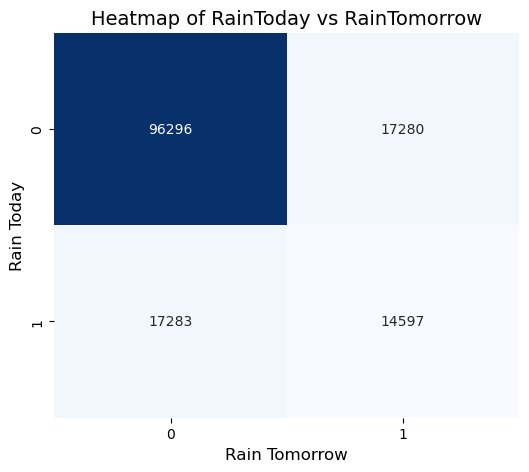

In [46]:
# 3. Heatmap: Relationship between RainToday and RainTomorrow
rain_ct = pd.crosstab(df['RainToday'], df['RainTomorrow'])
plt.figure(figsize=(6, 5))
sns.heatmap(rain_ct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Heatmap of RainToday vs RainTomorrow', fontsize=14)
plt.xlabel('Rain Tomorrow', fontsize=12)
plt.ylabel('Rain Today', fontsize=12)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

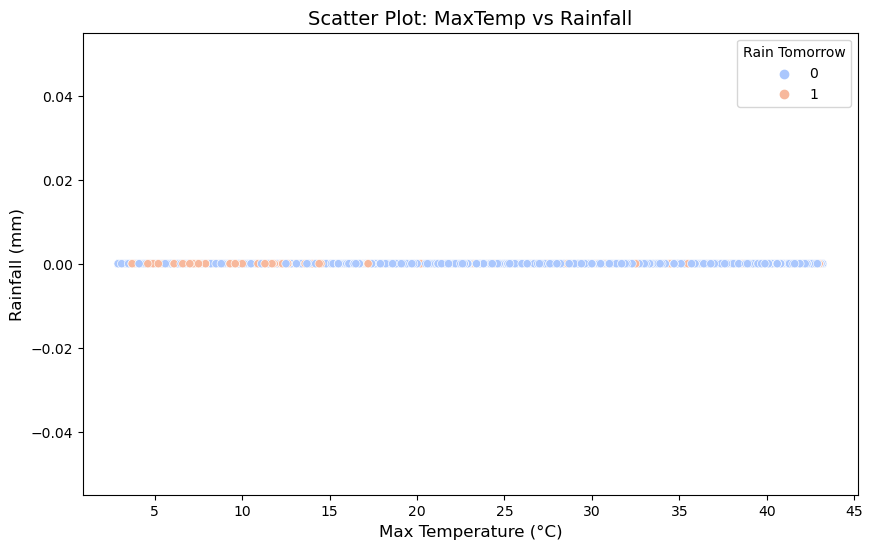

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df, hue='RainTomorrow', palette='coolwarm')
plt.title('Scatter Plot: MaxTemp vs Rainfall', fontsize=14)
plt.xlabel('Max Temperature (°C)', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.legend(title='Rain Tomorrow')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

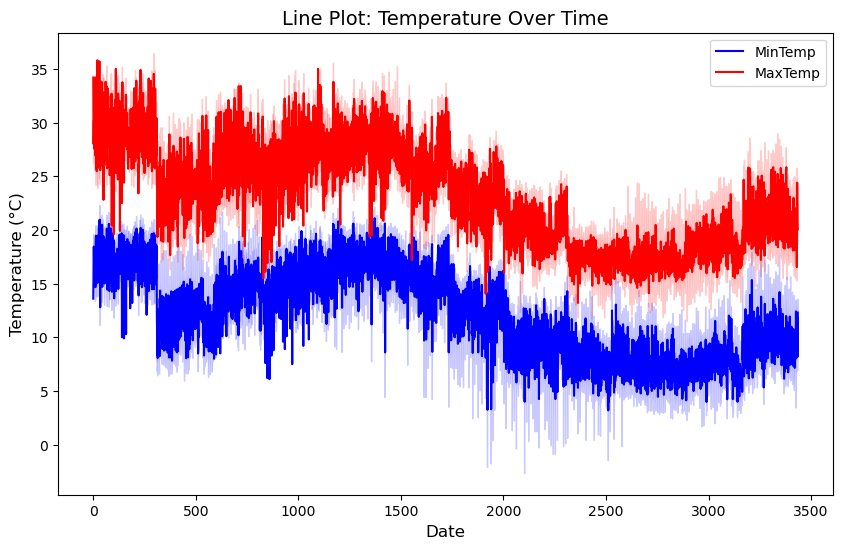

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='MinTemp', data=df, label='MinTemp', color='blue')
sns.lineplot(x='Date', y='MaxTemp', data=df, label='MaxTemp', color='red')
plt.title('Line Plot: Temperature Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


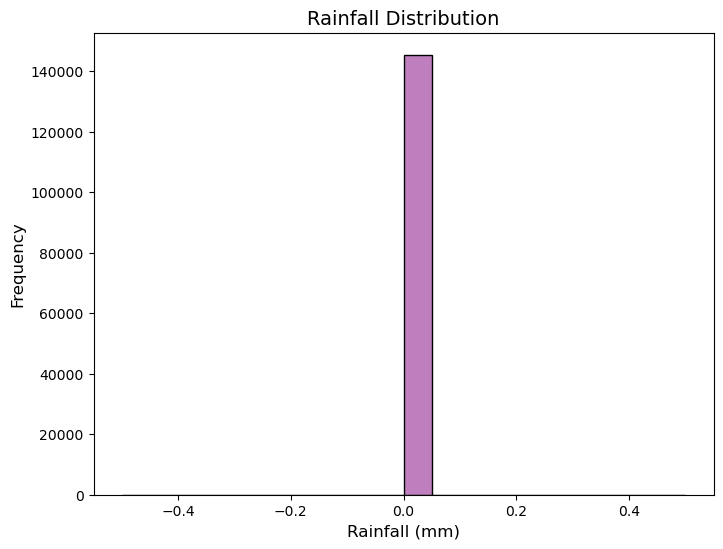

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], bins=20, kde=True, color='purple')
plt.title('Rainfall Distribution', fontsize=14)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


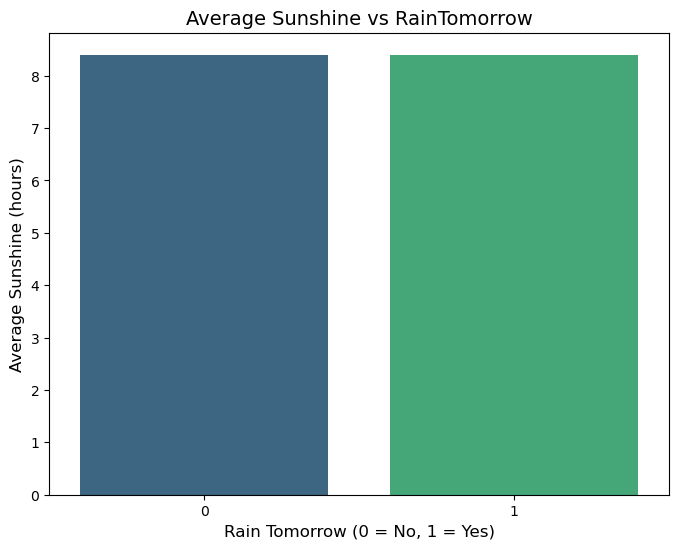

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainTomorrow', y='Sunshine', data=df, palette='viridis')
plt.title('Average Sunshine vs RainTomorrow', fontsize=14)
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Sunshine (hours)', fontsize=12)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


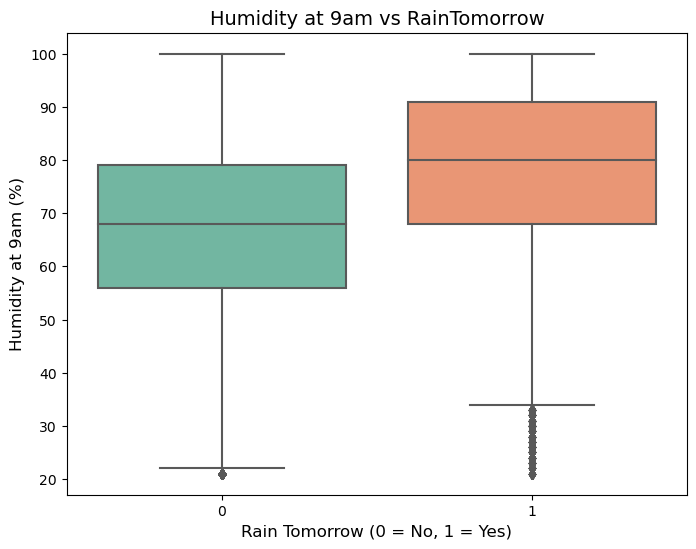

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='Humidity9am', data=df, palette='Set2')
plt.title('Humidity at 9am vs RainTomorrow', fontsize=14)
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Humidity at 9am (%)', fontsize=12)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df.drop(columns=['RainTomorrow'])  # All columns except the target
y = df['RainTomorrow']                # The target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (116364, 17)
X_test shape: (29092, 17)
y_train shape: (116364,)
y_test shape: (29092,)


In [55]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Evaluate models
for name, model in models.items():   
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")


Logistic Regression Accuracy: 0.83
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22659
           1       0.70      0.43      0.54      6433

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092

Decision Tree Accuracy: 0.78
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22659
           1       0.50      0.51      0.50      6433

    accuracy                           0.78     29092
   macro avg       0.68      0.68      0.68     29092
weighted avg       0.78      0.78      0.78     29092

Random Forest Accuracy: 0.85
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     22659
           1       0.74    

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [50, 100],  # تقليل القيم
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=5,  # تقليل عدد التكوينات العشوائية
    cv=2,  # تقليل عدد الطيات
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)


In [66]:
# Initialize the Random Forest model with the best parameters from the random search
best_params = random_search.best_params_

# Initialize the RandomForestClassifier with the best parameters and random_state
rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy)

# Display detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy of Random Forest Model: 0.8460057747834456
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     22659
           1       0.75      0.46      0.57      6433

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.84      0.85      0.83     29092

